# 피규어 출력

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import sys

In [2]:
#시각화 패키지들
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
from statsmodels.graphics.mosaicplot import mosaic
matplotlib.rcParams['axes.unicode_minus'] = False
#plt.style.use("ggplot")


In [3]:
#분석 관련
from scipy.stats import chi2_contingency
from scipy.stats import kstest
from statsmodels.formula.api import ols
from factor_analyzer import FactorAnalyzer

In [4]:
#기초 전처리 데이터 출력
x_train = pd.read_excel("../data/cip_preprocess.xlsx")
y_train = pd.read_excel("../data/cip_preprocess_y.xlsx")


In [5]:
sensibility = x_train[y_train['CIP']==0] # 
tolerance = x_train[y_train['CIP']==1] #

In [6]:
tolerance['iDBP']

0      65
5      81
7      84
10     64
11     50
       ..
366    78
369    69
370    62
371    62
372    62
Name: iDBP, Length: 188, dtype: int64

In [7]:
sensibility['iDBP']

1      59
2      95
3      77
4      79
6      40
       ..
360    47
362    56
367    64
368    82
373    63
Name: iDBP, Length: 186, dtype: int64

In [8]:
ks_res=kstest(tolerance['iDBP'], sensibility['iDBP'])
ks_res

KstestResult(statistic=0.15122397620681766, pvalue=0.023705872959253797)

iminus 지점:  74 0.1512239762068176


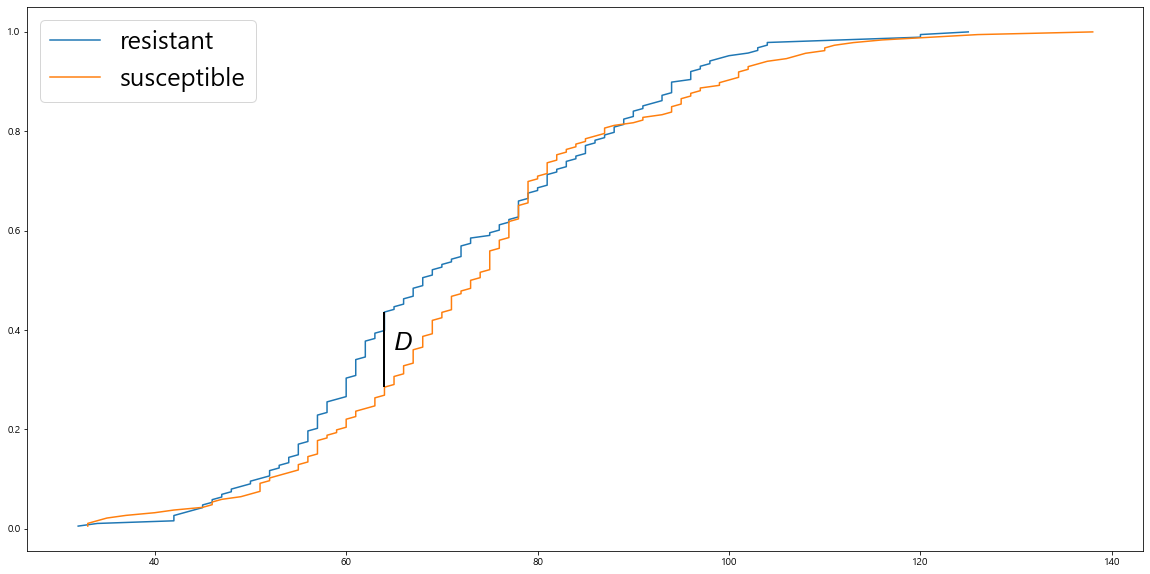

In [10]:

# fit an empirical cdf to a bimodal dataset
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize=(20,10))

# fit a cdf
ecdf = ECDF(tolerance['iDBP'])
ecdf2 = ECDF(sensibility['iDBP'])
# plot the cdf
gaps=np.abs(ecdf2(ecdf.x[1:]) - ecdf(ecdf.x[1:]))
iminus= np.argmax(gaps)

print("iminus 지점: ",iminus,gaps[iminus])

# plot the cdf
plt.plot(ecdf.x, ecdf.y,label='resistant')
plt.plot(ecdf2.x, ecdf2.y,label='susceptible')
plt.vlines([ecdf.x[1:][iminus]], ecdf2(ecdf.x[1:][iminus]),ecdf(ecdf.x[1:][iminus]), color='k', linestyle='solid', lw=2)
plt.text(ecdf.x[1:][iminus]+1,(ecdf2(ecdf.x[1:][iminus])+ecdf(ecdf.x[1:][iminus]))/2 , 
         'D',
         fontdict={'family': 'Arial',
          'color':  'black',
          'style': 'italic',
          'size': 25}
        )
plt.rc('legend', fontsize=25)
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.legend()

plt.savefig('./iDBP.png')
plt.show()

iminus 지점:  74 0.1512239762068176


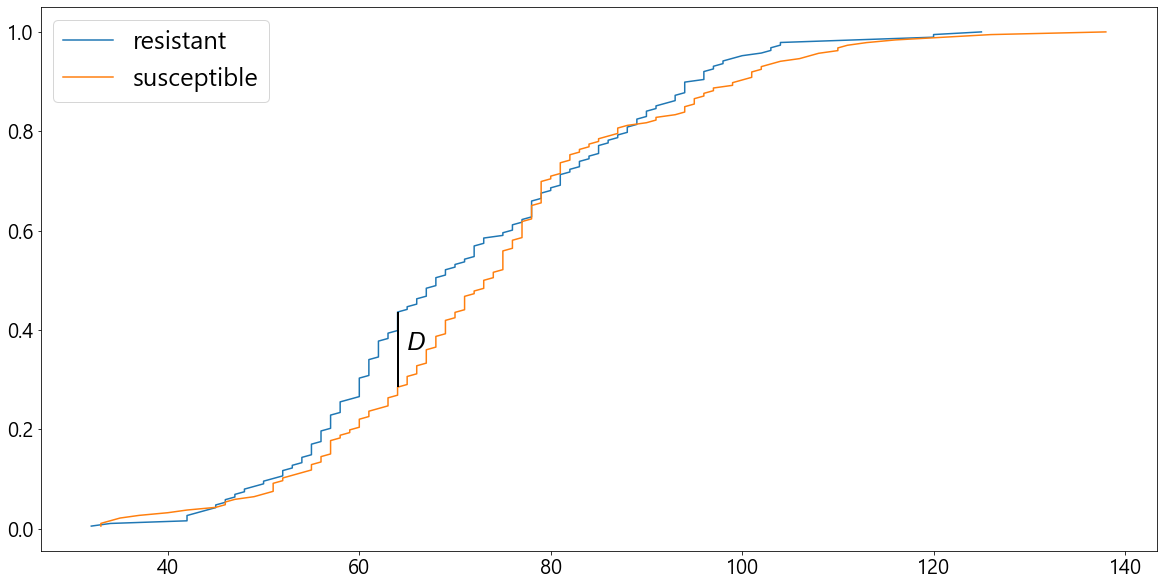

In [11]:

# fit an empirical cdf to a bimodal dataset
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize=(20,10))

# fit a cdf
ecdf = ECDF(tolerance['iDBP'])
ecdf2 = ECDF(sensibility['iDBP'])
# plot the cdf
gaps=np.abs(ecdf2(ecdf.x[1:]) - ecdf(ecdf.x[1:]))
iminus= np.argmax(gaps)

print("iminus 지점: ",iminus,gaps[iminus])

# plot the cdf
plt.plot(ecdf.x, ecdf.y,label='resistant')
plt.plot(ecdf2.x, ecdf2.y,label='susceptible')
plt.vlines([ecdf.x[1:][iminus]], ecdf2(ecdf.x[1:][iminus]),ecdf(ecdf.x[1:][iminus]), color='k', linestyle='solid', lw=2)
plt.text(ecdf.x[1:][iminus]+1,(ecdf2(ecdf.x[1:][iminus])+ecdf(ecdf.x[1:][iminus]))/2 , 
         'D',
         fontdict={'family': 'Arial',
          'color':  'black',
          'style': 'italic',
          'size': 25}
        )
plt.rc('legend', fontsize=25)
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.legend()

plt.savefig('./iDBP.png')
plt.show()

In [12]:
sensibility['pH']

1      7.455
2      7.433
3      7.541
4      7.526
6      7.430
       ...  
360    7.343
362    7.472
367    7.445
368    7.445
373    7.411
Name: pH, Length: 186, dtype: float64

In [44]:
ks_res=kstest(tolerance['pO2'], sensibility['pO2'])
ks_res

KstestResult(statistic=0.1206817661862274, pvalue=0.1168686835528796)

In [45]:
ks_res=kstest(tolerance['pH'], sensibility['pH'])
ks_res

KstestResult(statistic=0.09408602150537634, pvalue=0.3467087914829531)

iminus 지점:  51 0.12068176618622736


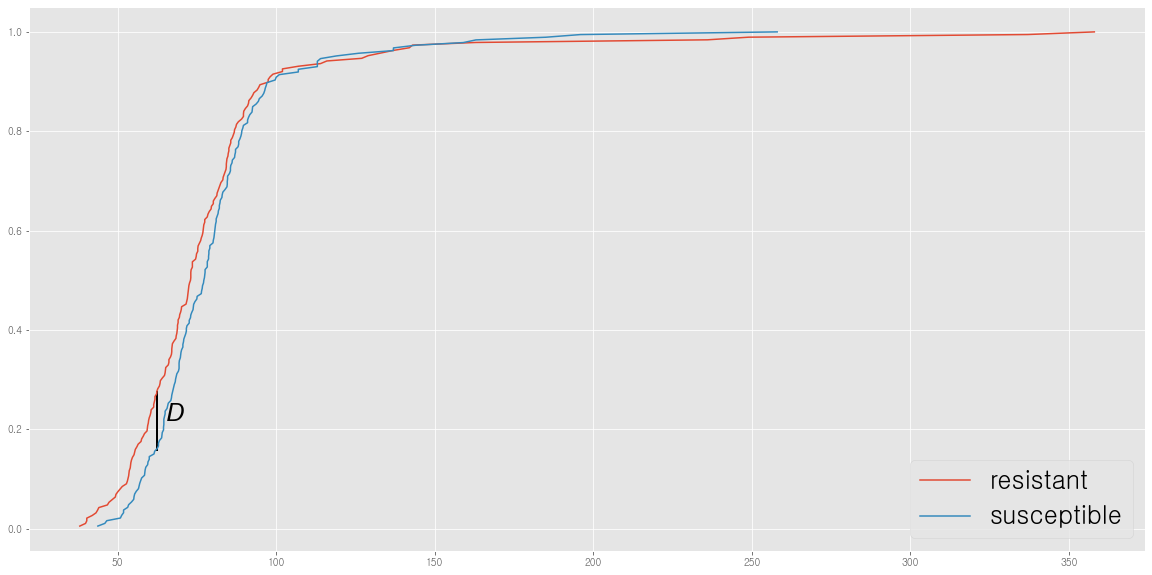

In [18]:

# fit an empirical cdf to a bimodal dataset
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize=(20,10))

# generate a sample
sample = hstack((tolerance['pO2'], sensibility['pO2']))
# fit a cdf
ecdf = ECDF(tolerance['pO2'])
ecdf2 = ECDF(sensibility['pO2'])

gaps=np.abs(ecdf2(ecdf.x[1:]) - ecdf(ecdf.x[1:]))
iminus= np.argmax(gaps)

print("iminus 지점: ",iminus,gaps[iminus])

# plot the cdf
plt.plot(ecdf.x, ecdf.y,label='resistant')
plt.plot(ecdf2.x, ecdf2.y,label='susceptible')
plt.vlines([ecdf.x[1:][iminus]], ecdf2(ecdf.x[1:][iminus]),ecdf(ecdf.x[1:][iminus]), color='k', linestyle='solid', lw=2)
plt.text(ecdf.x[1:][iminus]+3,(ecdf2(ecdf.x[1:][iminus])+ecdf(ecdf.x[1:][iminus]))/2 , 
         'D',
         fontdict={'family': 'Arial',
          'color':  'black',
          'style': 'italic',
          'size': 25}
        )
plt.rc('legend', fontsize=25)
plt.legend()
plt.savefig('./pO2.png')
plt.show()

In [118]:
ecdf(iminus)

0.07978723404255318

In [112]:
gaps=np.abs(ecdf2(ecdf.x[1:]) - ecdf(ecdf.x[1:]))
iminus= np.argmax(gaps)

print("iminus 지점: ",ecdf.x[1:][iminus],gaps[iminus])

iminus 지점:  62.4 0.12068176618622736


In [114]:
gaps[iminus]

0.12068176618622736

In [58]:
ecd=ECDF(sample)
ecd.y

array([0.        , 0.0026738 , 0.00534759, 0.00802139, 0.01069519,
       0.01336898, 0.01604278, 0.01871658, 0.02139037, 0.02406417,
       0.02673797, 0.02941176, 0.03208556, 0.03475936, 0.03743316,
       0.04010695, 0.04278075, 0.04545455, 0.04812834, 0.05080214,
       0.05347594, 0.05614973, 0.05882353, 0.06149733, 0.06417112,
       0.06684492, 0.06951872, 0.07219251, 0.07486631, 0.07754011,
       0.0802139 , 0.0828877 , 0.0855615 , 0.08823529, 0.09090909,
       0.09358289, 0.09625668, 0.09893048, 0.10160428, 0.10427807,
       0.10695187, 0.10962567, 0.11229947, 0.11497326, 0.11764706,
       0.12032086, 0.12299465, 0.12566845, 0.12834225, 0.13101604,
       0.13368984, 0.13636364, 0.13903743, 0.14171123, 0.14438503,
       0.14705882, 0.14973262, 0.15240642, 0.15508021, 0.15775401,
       0.16042781, 0.1631016 , 0.1657754 , 0.1684492 , 0.17112299,
       0.17379679, 0.17647059, 0.17914439, 0.18181818, 0.18449198,
       0.18716578, 0.18983957, 0.19251337, 0.19518717, 0.19786

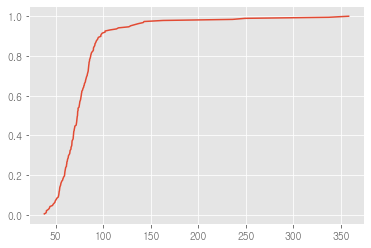

In [49]:
ecdf = ECDF(tolerance['pO2'])
ecdf2 = ECDF(sensibility['pO2'])
# plot the cdf
plt.plot(ecdf.x, ecdf.y,label='resistant')

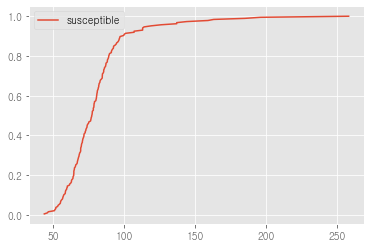

In [50]:
plt.plot(ecdf2.x, ecdf2.y,label='susceptible')
plt.legend()

# p-value

In [9]:

p_values = pd.read_excel("./values/p_value.xlsx")


In [10]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>,
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'font.family': ['Malgun Gothic'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

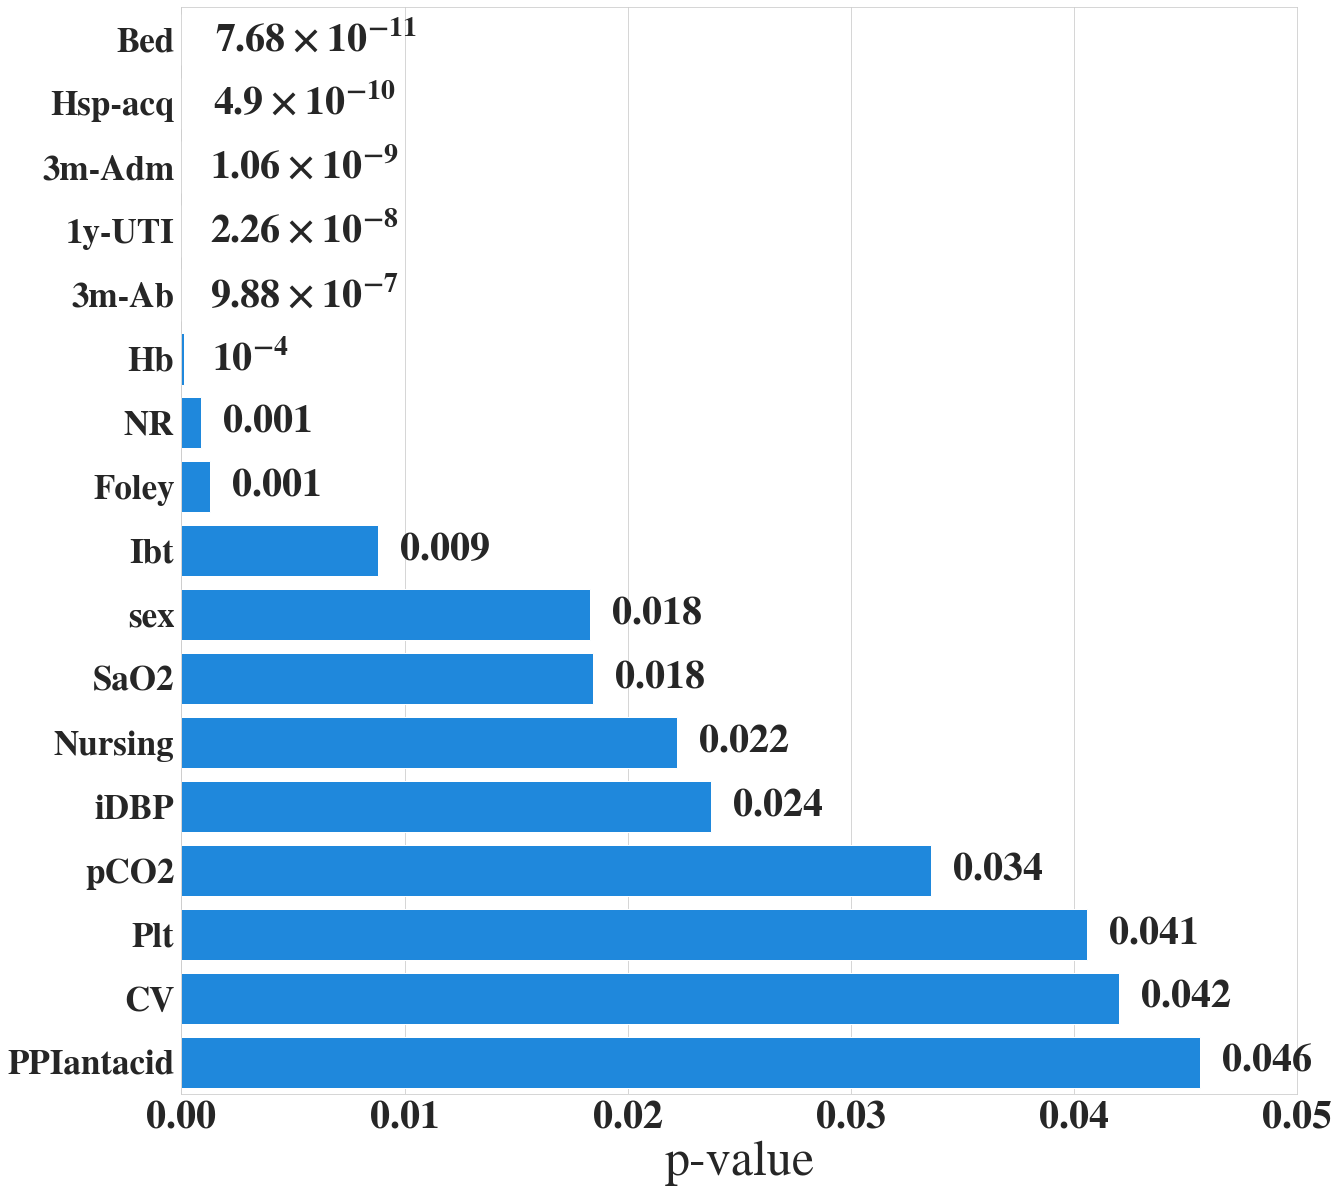

In [61]:
plt.figure(figsize=(20,20))
#sns.set( rc = {'figure.figsize' : ( 10, 20 ), 
#               'axes.labelsize' : 10 })
plt.rcParams['axes.unicode_minus'] = True
sns.set_style("whitegrid")

matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)



plot =sns.barplot(
    data= p_values,
    x= "p_value",
    y= "Feature",
    color='#008bfb'
)
for i, bar in enumerate(plot.axes.patches):
    h = bar.get_width()
    if i>5:
        plot.axes.text(
            h+0.003, # bar index (x coordinate of text)
            i, # y coordinate of text
            '{:.3f}'.format(h),  # y label
            ha='center', 
            va='center', 
            fontweight='bold', 
            size=40)
    elif i==0:
        plot.axes.text(
            h+0.006, # bar index (x coordinate of text)
            i, # y coordinate of text
            r'$\bf{7.68\times 10^{-11}}$',  # y label
            ha='center', 
            va='center', 
            fontweight='bold', 
            size=40)
    elif i==0:
        plot.axes.text(
            h+0.0055, # bar index (x coordinate of text)
            i, # y coordinate of text
            r'$\bf{4.9\times 10^{-10}}$',  # y label
            ha='center', 
            va='center', 
            fontweight='bold', 
            size=40)
    elif i==1:
        plot.axes.text(
            h+0.0055, # bar index (x coordinate of text)
            i, # y coordinate of text
            r'$\bf{4.9\times 10^{-10}}$',  # y label
            ha='center', 
            va='center', 
            fontweight='bold', 
            size=40)
    elif i==2:
        plot.axes.text(
            h+0.0055, # bar index (x coordinate of text)
            i, # y coordinate of text
            r'$\bf{1.06\times 10^{-9}}$',  # y label
            ha='center', 
            va='center', 
            fontweight='bold', 
            size=40)
    elif i==3:
        plot.axes.text(
            h+0.0055, # bar index (x coordinate of text)
            i, # y coordinate of text
            r'$\bf{2.26\times 10^{-8}}$',  # y label
            ha='center', 
            va='center', 
            fontweight='bold', 
            size=40)
    elif i==4:
        plot.axes.text(
            h+0.0055, # bar index (x coordinate of text)
            i, # y coordinate of text
            r'$\bf{9.88\times 10^{-7}}$',  # y label
            ha='center', 
            va='center', 
            fontweight='bold', 
            size=40)
    elif i==5:
        plot.axes.text(
            h+0.003, # bar index (x coordinate of text)
            i, # y coordinate of text
            r'$\bf{10^{-4}}$',  # y label
            ha='center', 
            va='center', 
            fontweight='bold', 
            size=40)

plot.axes.set_xlim(0,0.05)
#plot.set(xticklabels=[])  
#plot.set(title='Penguins: Body Mass by Species for Gender')
plot.set(ylabel=None)
plt.xticks(fontsize=40,fontweight='bold')
plt.yticks(fontsize=35,fontweight='bold')
plot.set_xlabel("p-value",fontsize=50)


font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#plt.title("통계적 검정에 의해 선택된 입력 특징들",fontsize=35)
#plot.tick_params(left=False)  # remove the ticks
plt.savefig('./FIGURES/p_values.png')


#colors = ['#008bfb']
#sns.set_palette(sns.color_palette(colors))

In [31]:
p_values

,type,Feature,p_value
0,Cat,Bed,7.680000e-11
1,Cat,Hsp-acq,4.900000e-10
2,Cat,3m-Adm,1.060000e-09
3,Cat,1y-UTI,2.260000e-08
4,Cat,3m-Ab,9.880000e-07
5,Num,Hb,1.010000e-04
6,Cat,NR,8.960000e-04
7,Cat,Foley,1.282000e-03
8,Num,Ibt,8.799000e-03
9,Cat,sex,1.830300e-02


# shap

In [9]:

origin_shap_val = pd.read_excel("./values/origin_shap_val.xlsx")
origin_shap_val = origin_shap_val[:20]
origin_shap_val

,col,mean_shap_values
0,bed,0.028555
1,3m-Adm,0.018249
2,Hsp-acq,0.017348
3,1y-UTI,0.014276
4,3m-Ab,0.007518
5,Hb,0.007509
6,iBT,0.007305
7,SaO2,0.002183
8,Foley,0.002119
9,iDBP,0.001949


In [10]:
origin_shap_val.columns

Index(['col', 'mean_shap_values'], dtype='object')

In [11]:
plot

NameError: name 'plot' is not defined

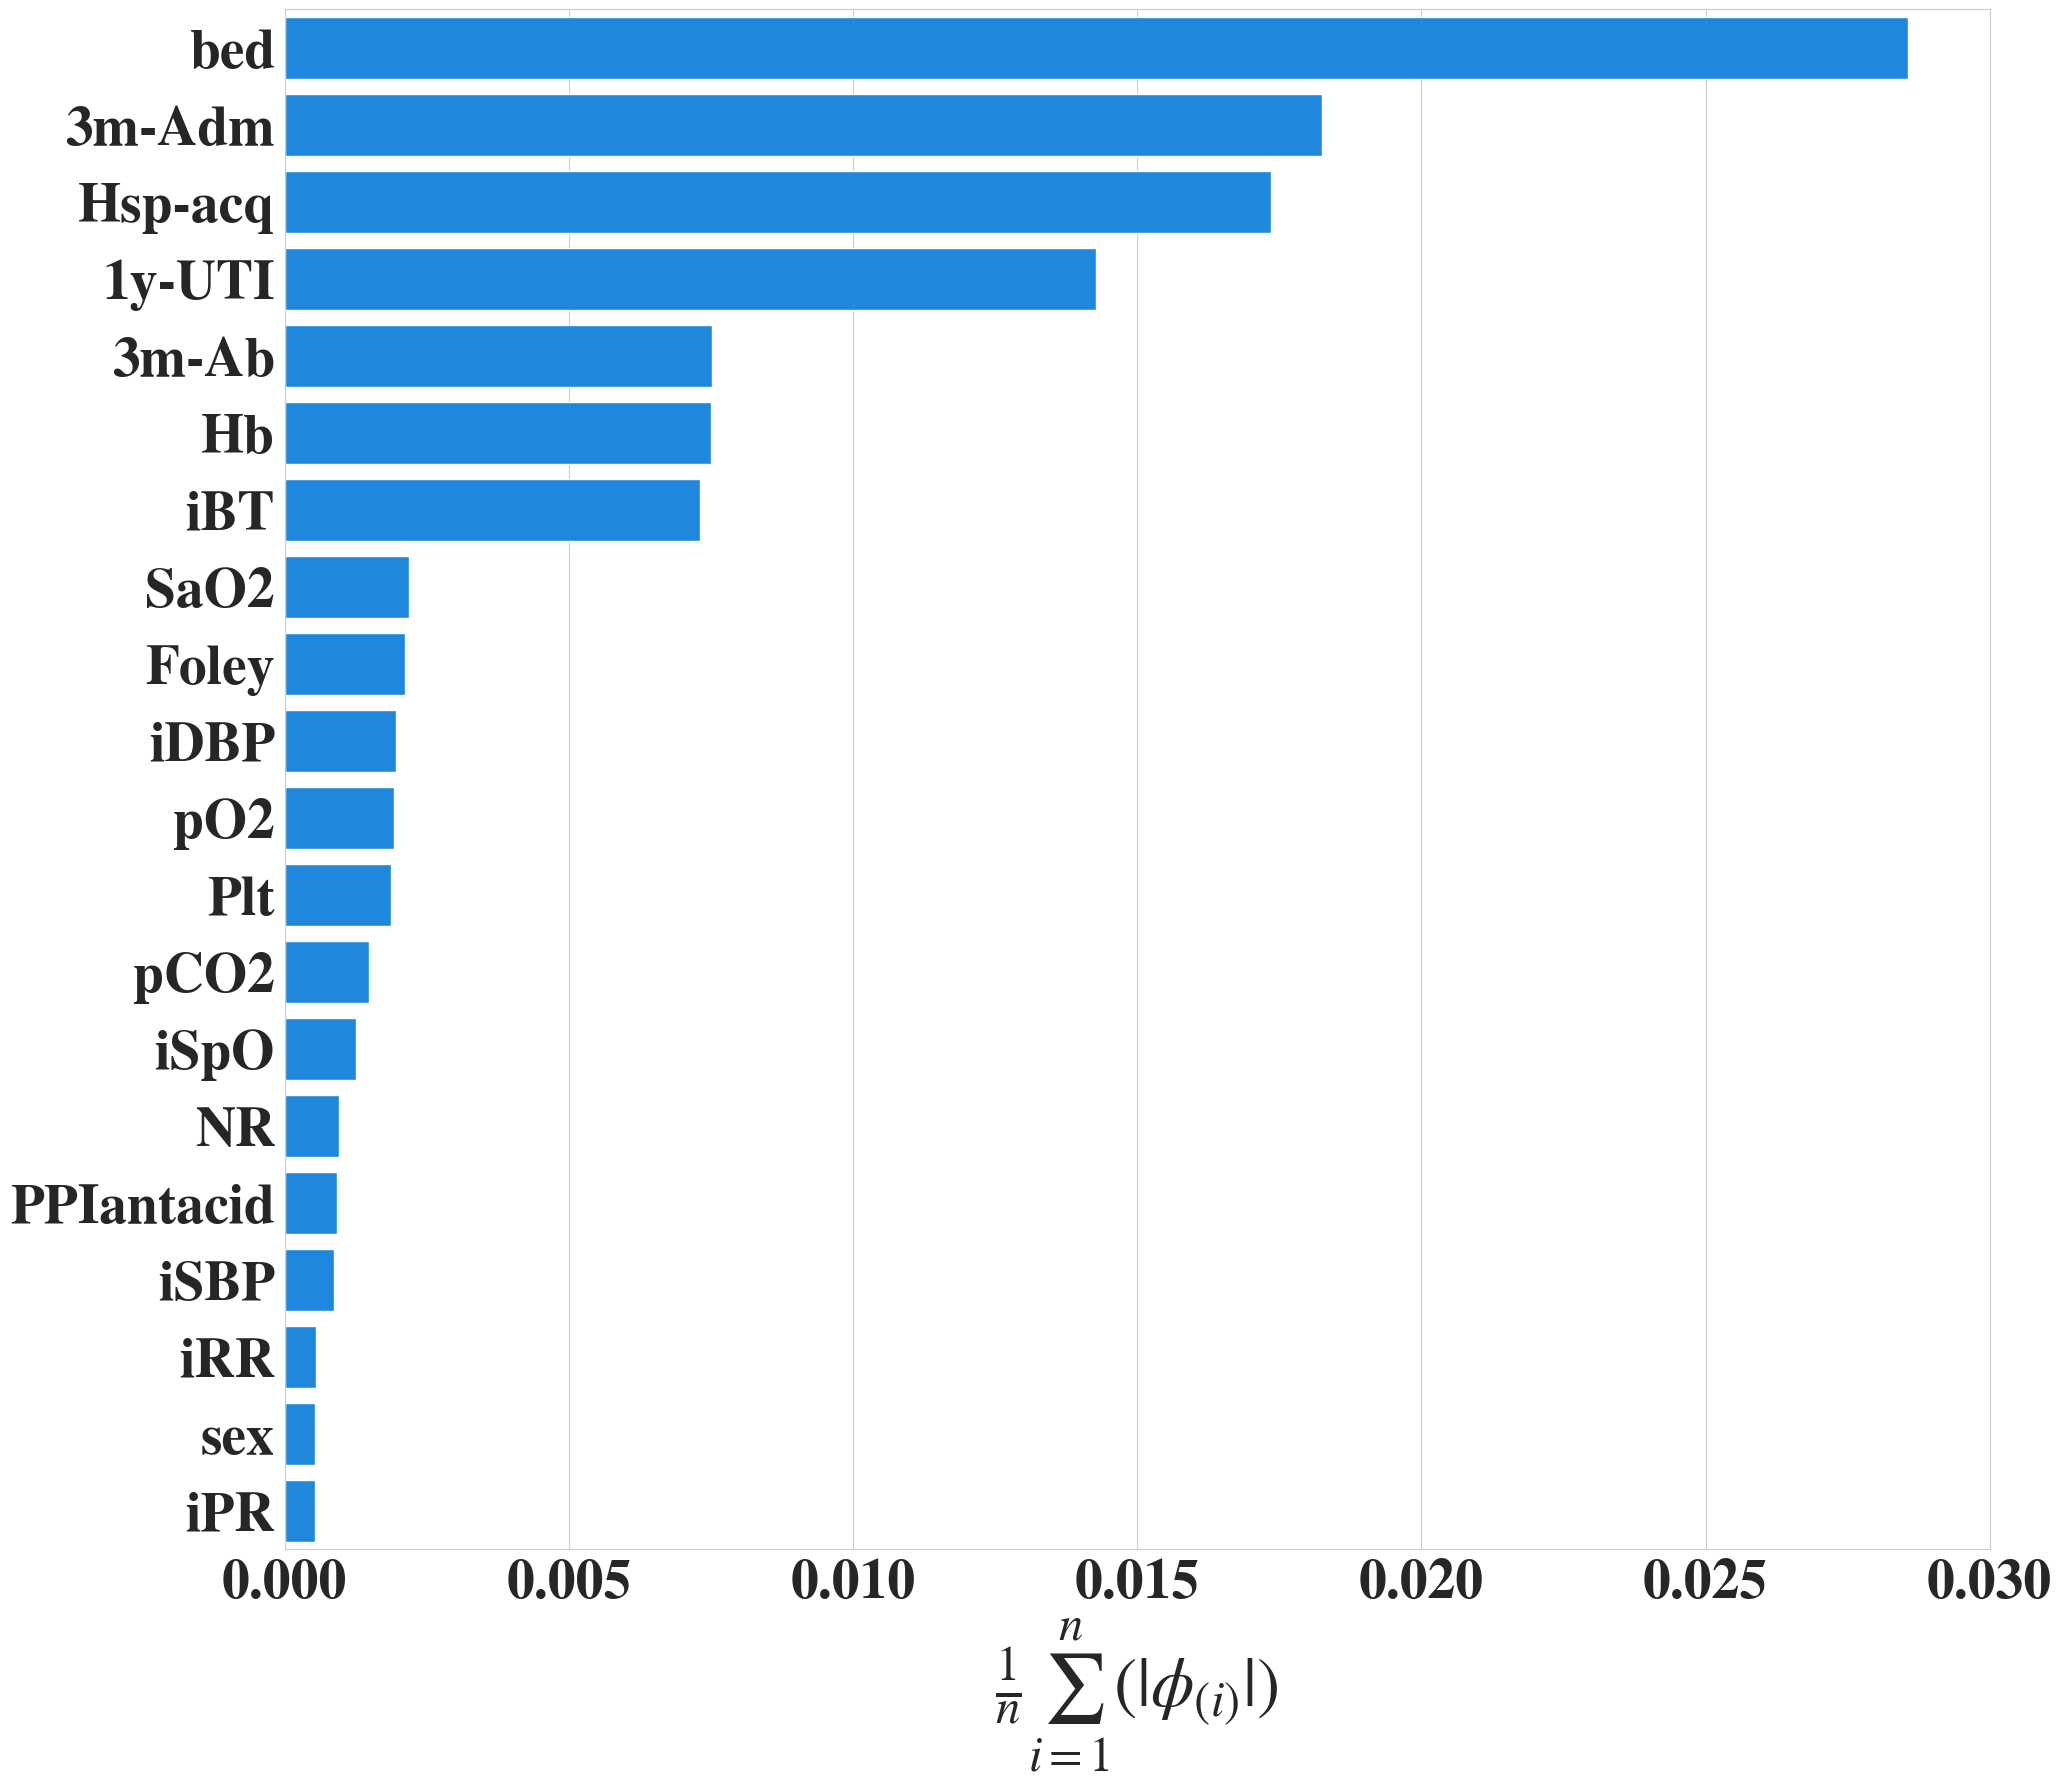

In [18]:
plt.figure(figsize=(22,20))
#sns.set( rc = {'figure.figsize' : ( 10, 20 ), 
#               'axes.labelsize' : 10 })
sns.set_style("whitegrid")
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)


plot =sns.barplot(
    data= origin_shap_val,
    x= 'mean_shap_values',
    y= "col",
    color='#008bfb'
)
for i, bar in enumerate(plot.axes.patches):
    h = bar.get_width()
#     plot.axes.text(
#         h+0.002, # bar index (x coordinate of text)
#         i, # y coordinate of text
#         '{:.3f}'.format(h),  # y label
#         ha='center', 
#         va='center', 
#         #fontweight='bold', 
#         size=30)
plot.axes.set_xlim(0,0.03)
#plot.set(xticklabels=[])  
#plot.set(title='Penguins: Body Mass by Species for Gender')
plot.set(ylabel=None)
plt.xticks(fontsize=40,fontweight='bold')
plt.yticks(fontsize=40,fontweight='bold')
plot.set_xlabel(r'$\frac{1}{n}\sum_{i=1}^{n} \left ( \left| \phi_{(i)}   \right| \right )$',fontsize=50,fontweight='bold')
#plot.tick_params(left=False)  # remove the ticks
plt.savefig('./FIGURES/rf_shap.png')


#colors = ['#008bfb']
#sns.set_palette(sns.color_palette(colors))

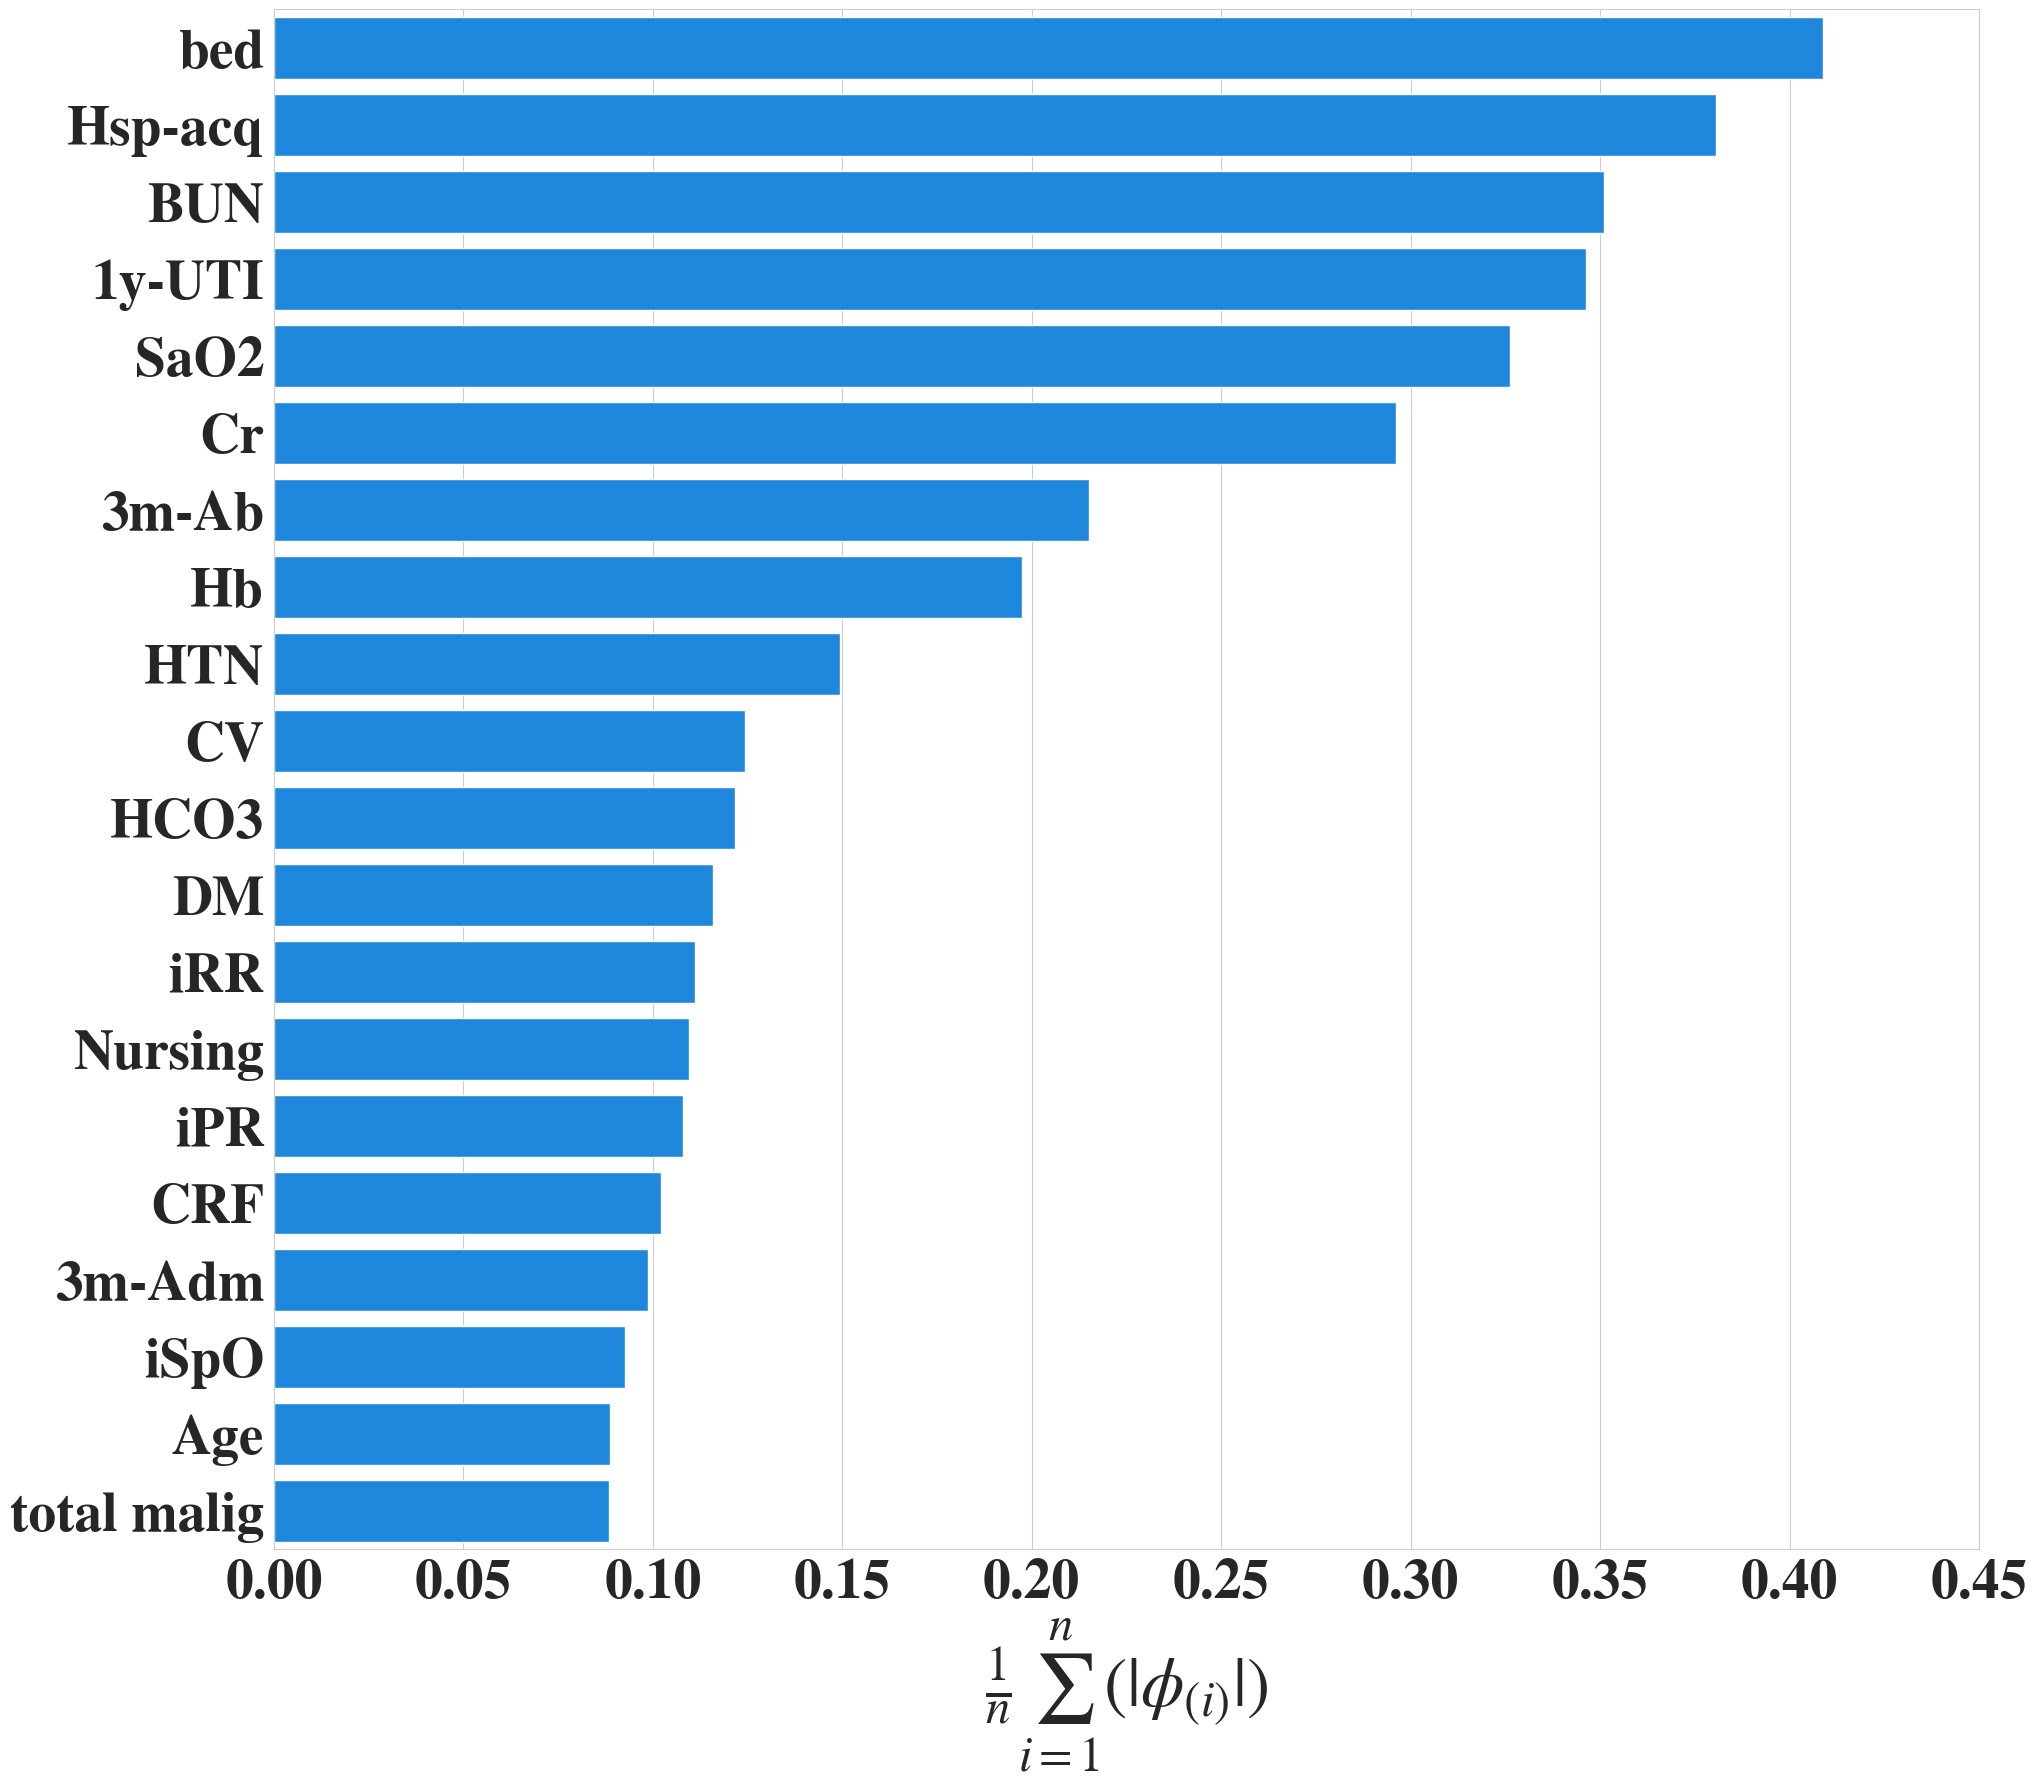

In [19]:

origin_shap_val = pd.read_excel("./values/logitic_shap_val.xlsx")
origin_shap_val = origin_shap_val[:20]
origin_shap_val

plt.figure(figsize=(22,20))
#sns.set( rc = {'figure.figsize' : ( 10, 20 ), 
#               'axes.labelsize' : 10 })
sns.set_style("whitegrid")
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)

plot =sns.barplot(
    data= origin_shap_val,
    x= 'mean_shap_values',
    y= "col",
    color='#008bfb'
)
for i, bar in enumerate(plot.axes.patches):
    h = bar.get_width()
#     plot.axes.text(
#         h+0.03, # bar index (x coordinate of text)
#         i, # y coordinate of text
#         '{:.3f}'.format(h),  # y label
#         ha='center', 
#         va='center', 
#         #fontweight='bold', 
#         size=18)
plot.axes.set_xlim(0,0.45)
#plot.set(xticklabels=[])  
#plot.set(title='Penguins: Body Mass by Species for Gender')
plot.set(ylabel=None)
plt.xticks(fontsize=40,fontweight='bold')
plt.yticks(fontsize=40,fontweight='bold')
plot.set_xlabel(r'$\frac{1}{n}\sum_{i=1}^{n} \left ( \left| \phi_{(i)}   \right| \right )$',fontsize=50,fontweight='bold')
#plot.tick_params(left=False)  # remove the ticks
plt.savefig('./FIGURES/logistic_shap.png')


#colors = ['#008bfb']
#sns.set_palette(sns.color_palette(colors))


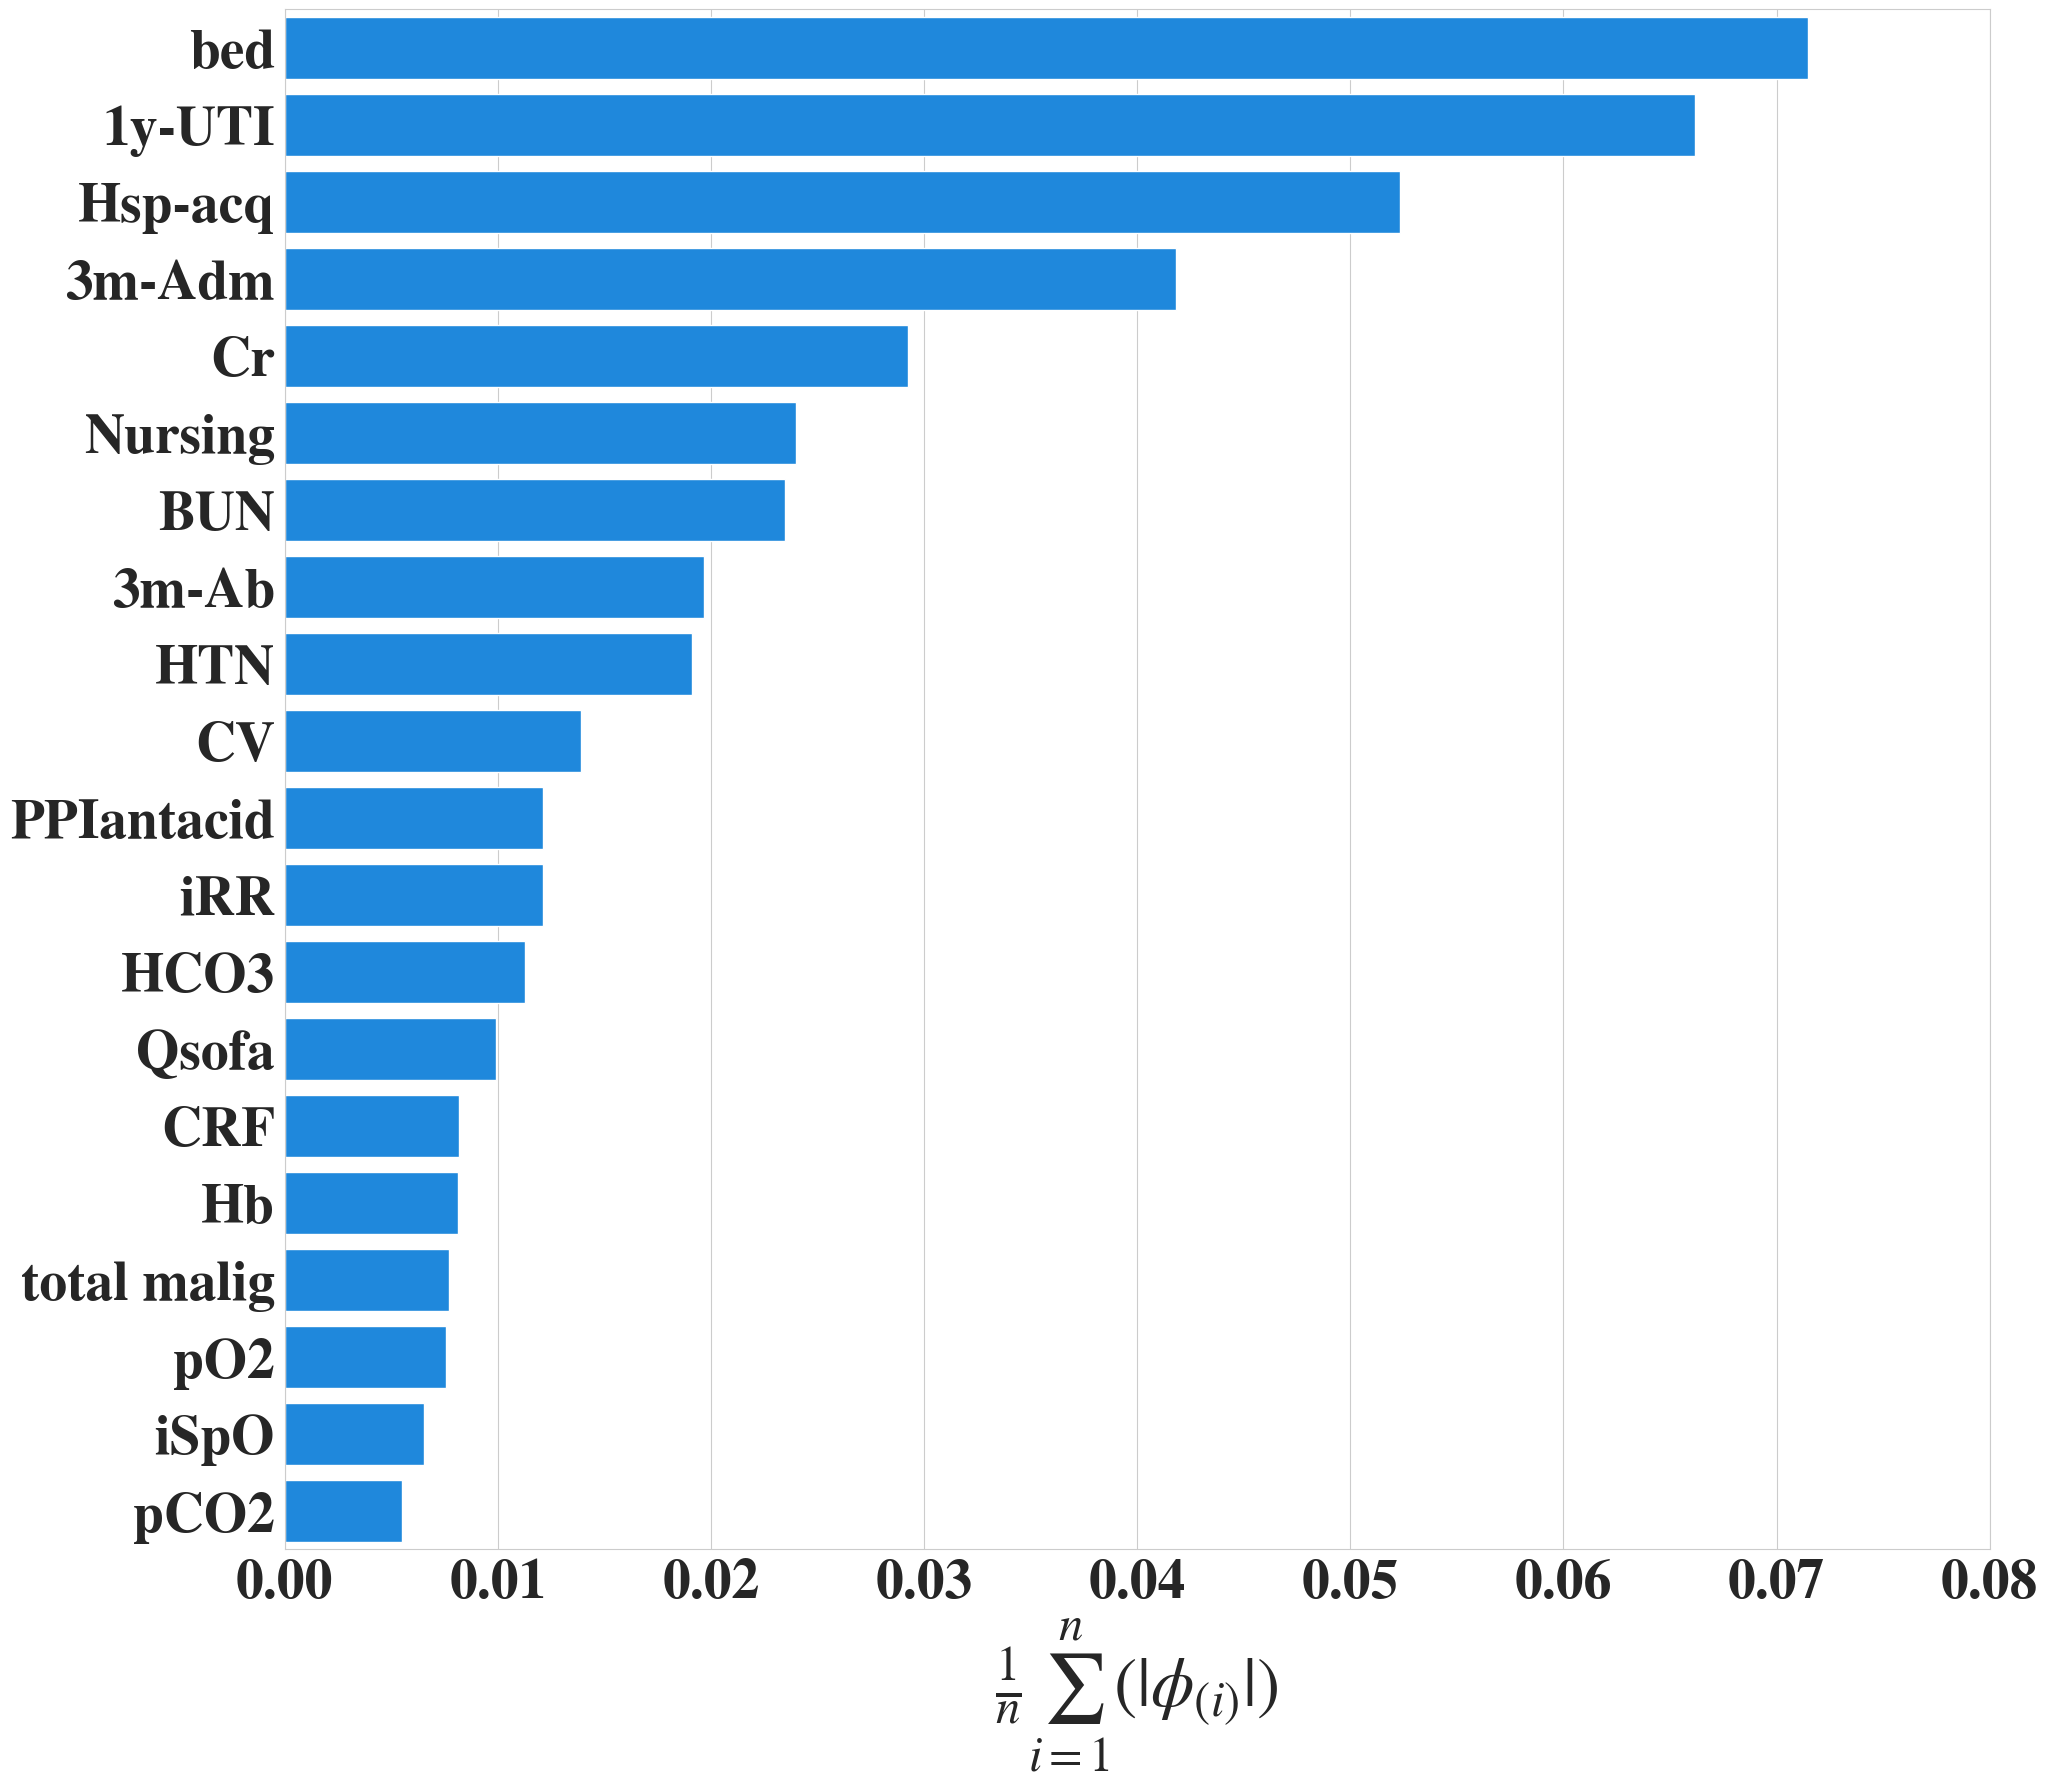

In [20]:

origin_shap_val = pd.read_excel("./values/svm_shap_val.xlsx")
origin_shap_val = origin_shap_val[:20]
origin_shap_val

plt.figure(figsize=(22,20))
#sns.set( rc = {'figure.figsize' : ( 10, 20 ), 
#               'axes.labelsize' : 10 })
sns.set_style("whitegrid")
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)
plot =sns.barplot(
    data= origin_shap_val,
    x= 'mean_shap_values',
    y= "col",
    color='#008bfb'
)
for i, bar in enumerate(plot.axes.patches):
    h = bar.get_width()
#     plot.axes.text(
#         h+0.005, # bar index (x coordinate of text)
#         i, # y coordinate of text
#         '{:.3f}'.format(h),  # y label
#         ha='center', 
#         va='center', 
#         #fontweight='bold', 
#         size=18)
plot.axes.set_xlim(0,0.08)
#plot.set(xticklabels=[])  
#plot.set(title='Penguins: Body Mass by Species for Gender')
plot.set(ylabel=None)
plt.xticks(fontsize=40,fontweight='bold')
plt.yticks(fontsize=40,fontweight='bold')
plot.set_xlabel(r'$\frac{1}{n}\sum_{i=1}^{n} \left ( \left| \phi_{(i)}   \right| \right )$',fontsize=50,fontweight='bold')
#plot.tick_params(left=False)  # remove the ticks
plt.savefig('./FIGURES/svm_shap.png')


#colors = ['#008bfb']
#sns.set_palette(sns.color_palette(colors))


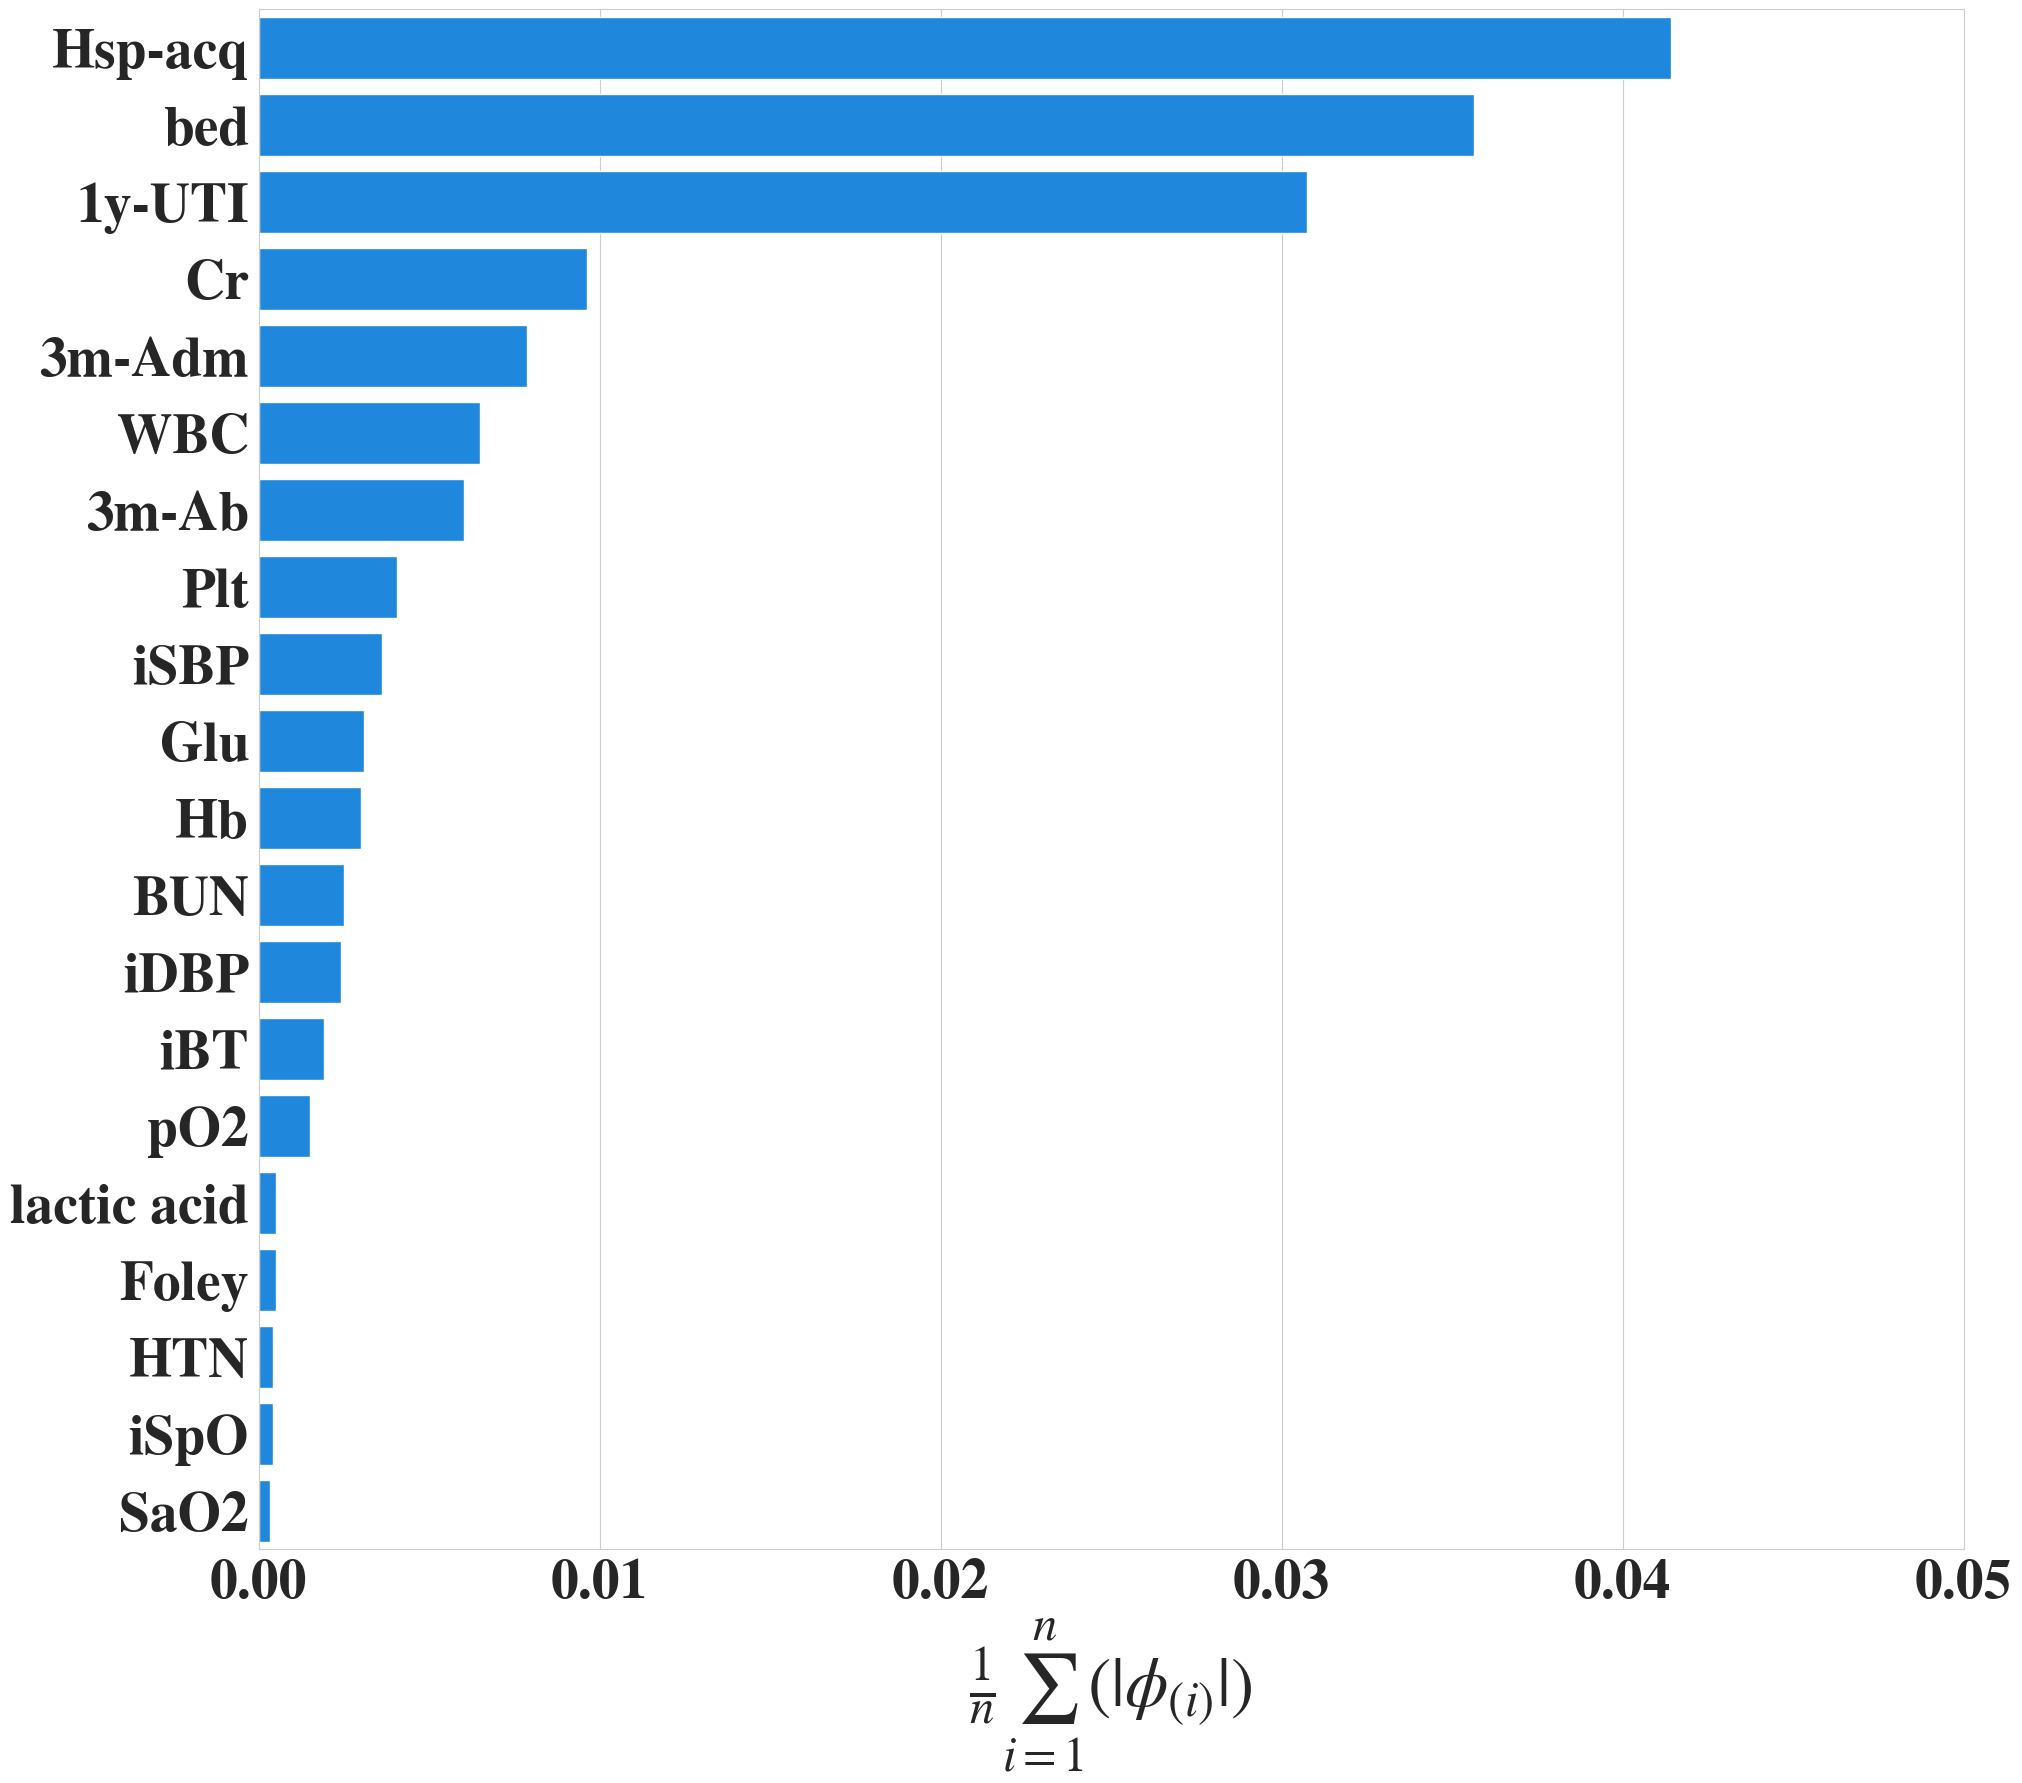

In [21]:

origin_shap_val = pd.read_excel("./values/gbm_shap_val.xlsx")
origin_shap_val = origin_shap_val[:20]
origin_shap_val

plt.figure(figsize=(22,20))
#sns.set( rc = {'figure.figsize' : ( 10, 20 ), 
#               'axes.labelsize' : 10 })
sns.set_style("whitegrid")
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)

plot =sns.barplot(
    data= origin_shap_val,
    x= 'mean_shap_values',
    y= "col",
    color='#008bfb'
)
for i, bar in enumerate(plot.axes.patches):
    h = bar.get_width()
#     plot.axes.text(
#         h+0.003, # bar index (x coordinate of text)
#         i, # y coordinate of text
#         '{:.3f}'.format(h),  # y label
#         ha='center', 
#         va='center', 
#         #fontweight='bold', 
#         size=18)
plot.axes.set_xlim(0,0.05)
#plot.set(xticklabels=[])  
#plot.set(title='Penguins: Body Mass by Species for Gender')
plot.set(ylabel=None)
plt.xticks(fontsize=40,fontweight='bold')
plt.yticks(fontsize=40,fontweight='bold')
plot.set_xlabel(r'$\frac{1}{n}\sum_{i=1}^{n} \left ( \left| \phi_{(i)}   \right| \right )$',fontsize=50,fontweight='bold')
#plot.tick_params(left=False)  # remove the ticks
plt.savefig('./FIGURES/gbm_shap.png')


#colors = ['#008bfb']
#sns.set_palette(sns.color_palette(colors))


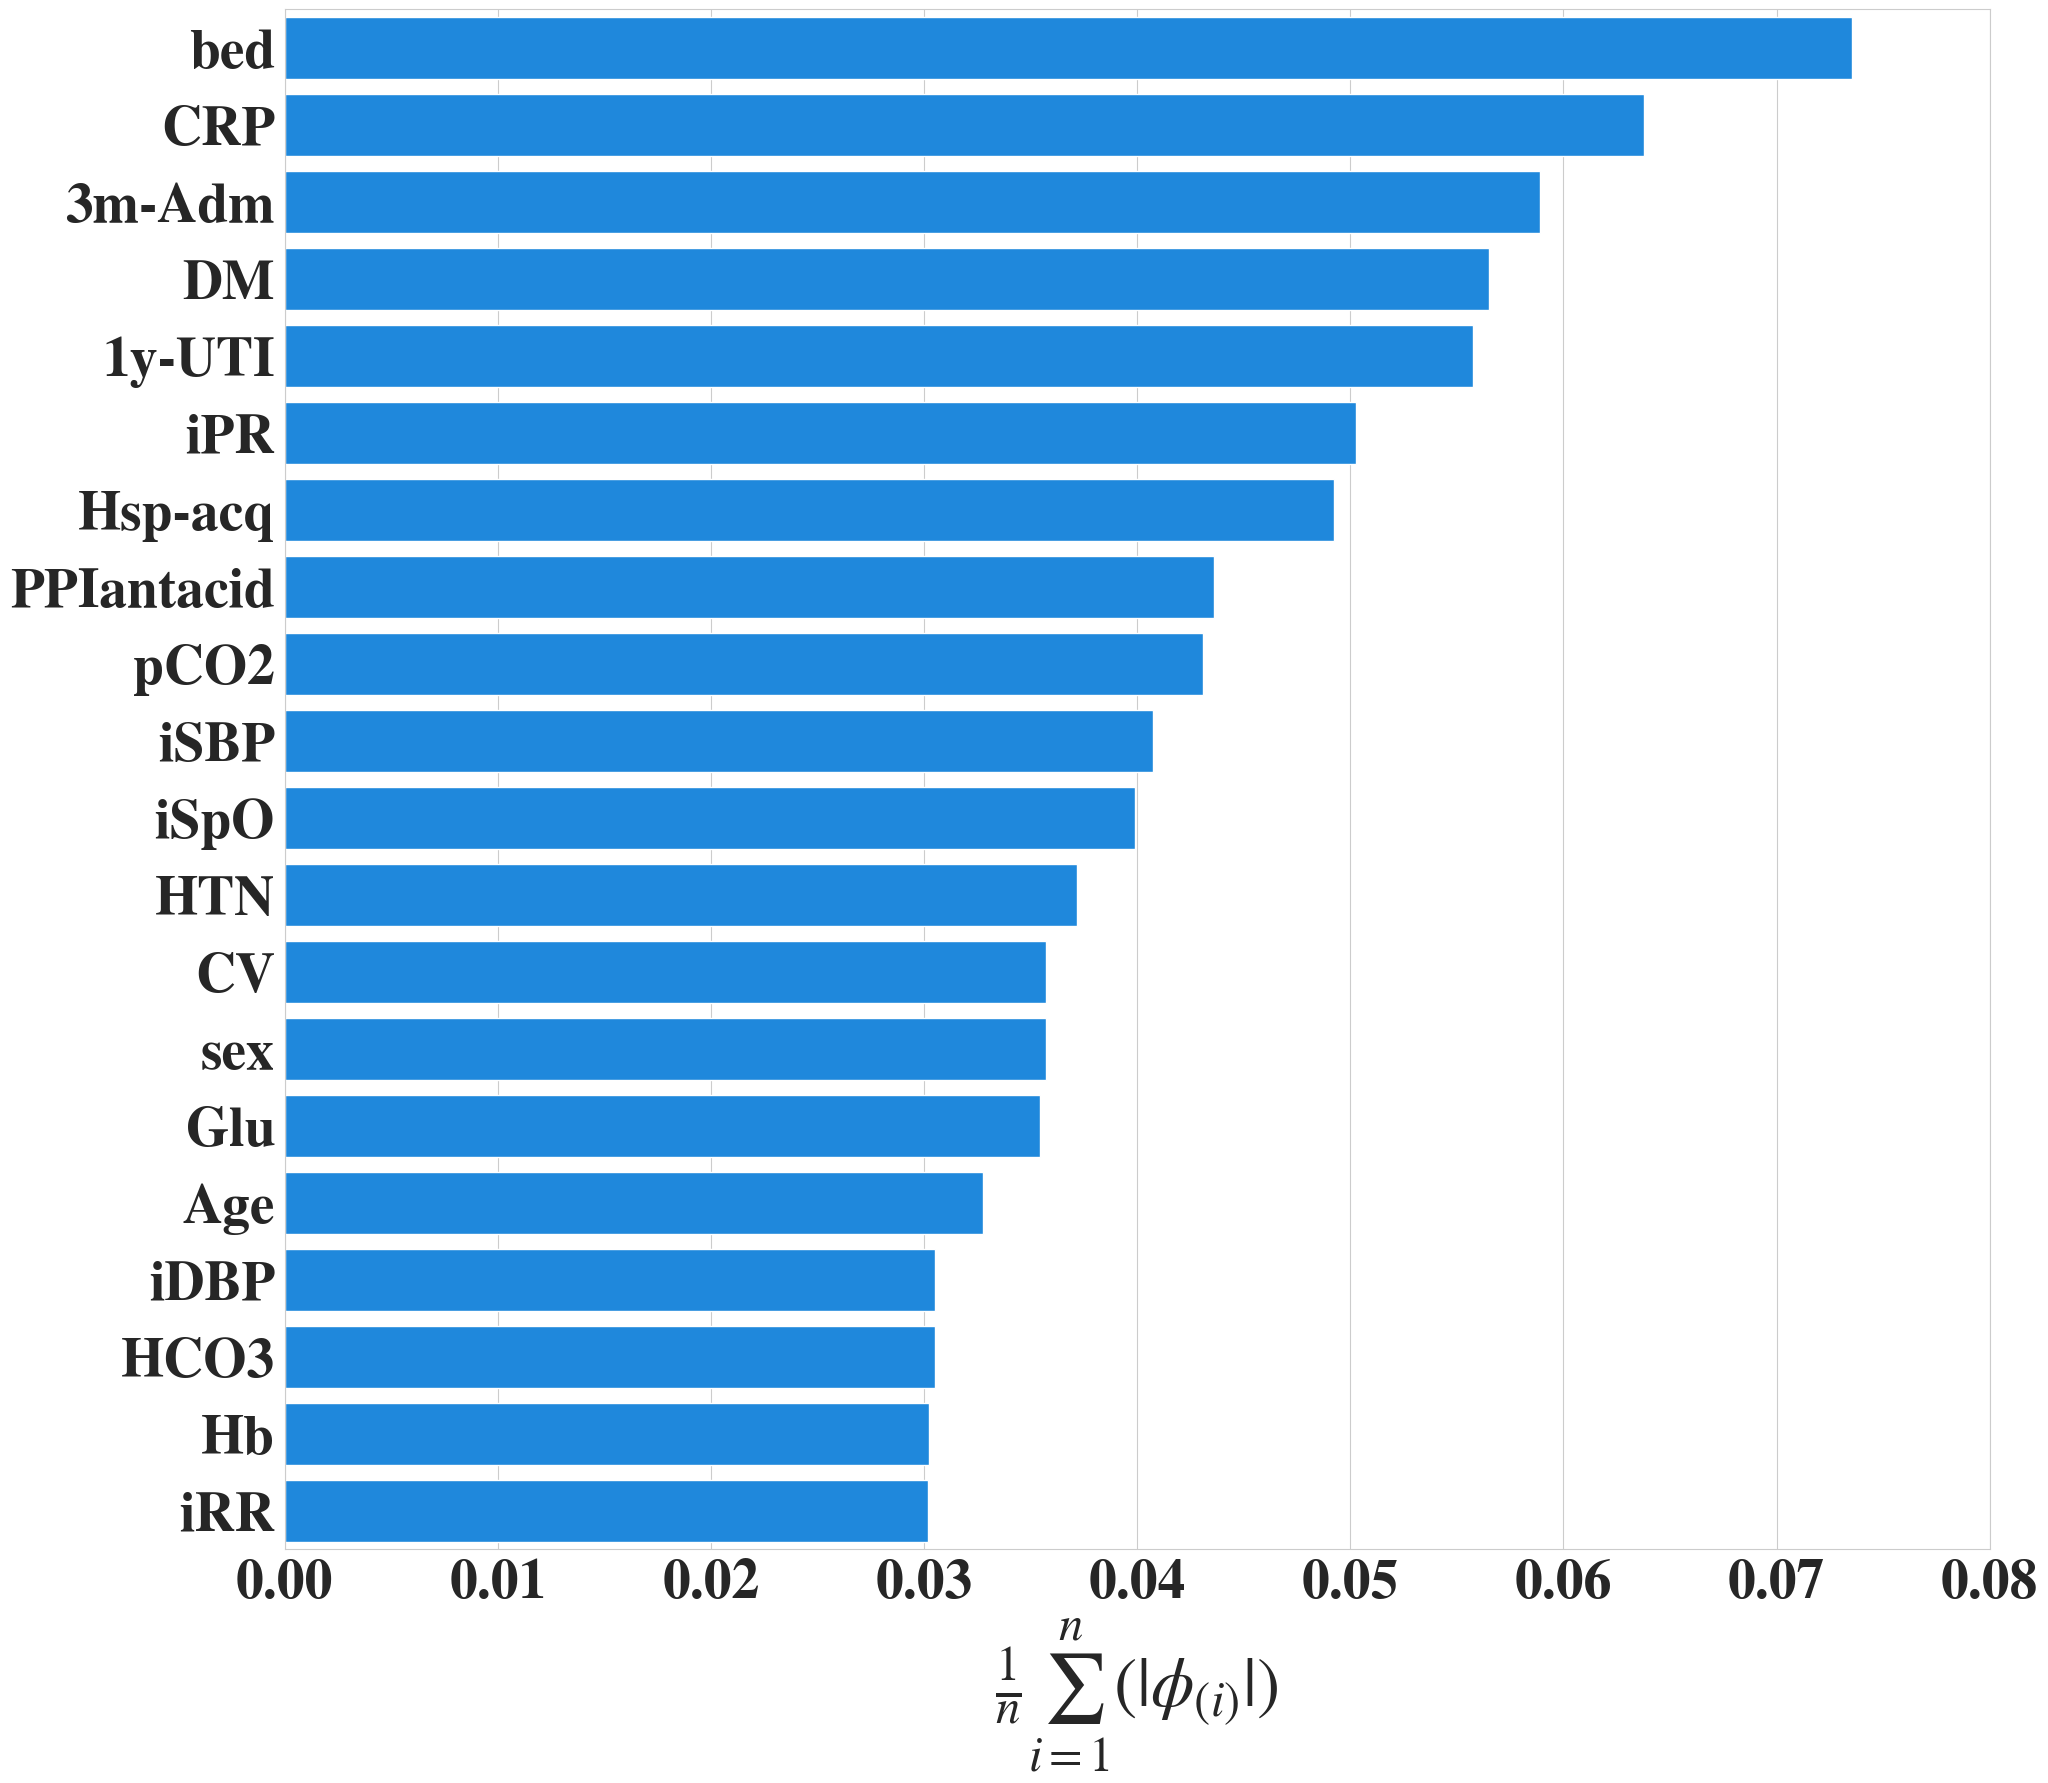

In [22]:

origin_shap_val = pd.read_excel("./values/mlp_shap_val.xlsx")
origin_shap_val = origin_shap_val[:20]
origin_shap_val

plt.figure(figsize=(22,20))
#sns.set( rc = {'figure.figsize' : ( 10, 20 ), 
#               'axes.labelsize' : 10 })
sns.set_style("whitegrid")
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)
plot =sns.barplot(
    data= origin_shap_val,
    x= 'mean_shap_values',
    y= "col",
    color='#008bfb'
)
for i, bar in enumerate(plot.axes.patches):
    h = bar.get_width()
#     plot.axes.text(
#         h+0.004, # bar index (x coordinate of text)
#         i, # y coordinate of text
#         '{:.3f}'.format(h),  # y label
#         ha='center', 
#         va='center', 
#         #fontweight='bold', 
#         size=18)
plot.axes.set_xlim(0,0.08)
#plot.set(xticklabels=[])  
#plot.set(title='Penguins: Body Mass by Species for Gender')
plot.set(ylabel=None)
plt.xticks(fontsize=40,fontweight='bold')
plt.yticks(fontsize=40,fontweight='bold')
plot.set_xlabel(r'$\frac{1}{n}\sum_{i=1}^{n} \left ( \left| \phi_{(i)}   \right| \right )$',fontsize=50,fontweight='bold')
#plot.tick_params(left=False)  # remove the ticks
plt.savefig('./FIGURES/mlp_shap.png')


#colors = ['#008bfb']
#sns.set_palette(sns.color_palette(colors))


# AUCS

In [23]:

stat_aucs = pd.read_excel("./values/aucs.xlsx",index_col=0)


In [24]:
stat_transposed=stat_aucs.transpose()
stat_transposed

,LR,RF,GB,MLP,SVM
10,0.7247,0.7616,0.7390,0.7526,0.7677
15,0.7052,0.7632,0.7537,0.7354,0.7401
17 *,0.6889,0.7686,0.7566,0.7460,0.7600
38 (Base),0.6636,0.7618,0.7283,0.6464,0.7596


In [25]:
stat_transposed.index.name = 'num_of_params'
stat_transposed.columns.name='model'

In [26]:
stat_transposed.index  = list(map(str,stat_transposed.index))

In [27]:
stat_transposed.index.name = 'num_of_params'
stat_transposed.columns.name='model'

In [28]:
stat_transposed

model,LR,RF,GB,MLP,SVM
num_of_params,,,,,
10,0.7247,0.7616,0.7390,0.7526,0.7677
15,0.7052,0.7632,0.7537,0.7354,0.7401
17 *,0.6889,0.7686,0.7566,0.7460,0.7600
38 (Base),0.6636,0.7618,0.7283,0.6464,0.7596


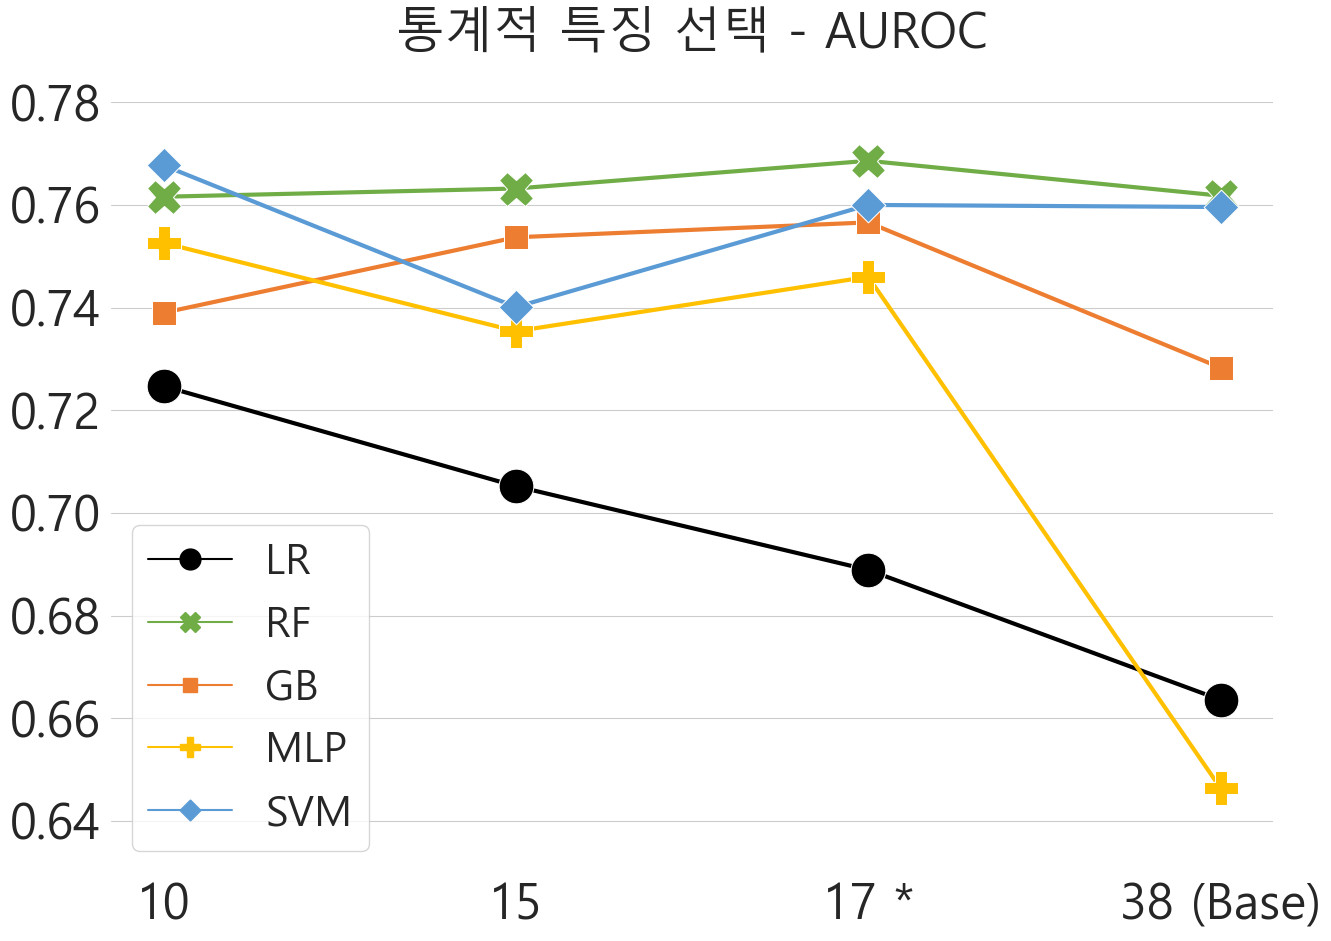

In [36]:
sns.set_style("whitegrid", {'axes.grid' : False})
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


fig = plt.figure(figsize=(15,10))

plot=sns.lineplot(data=stat_transposed,
                  dashes=False,
                  markers=True,
                  palette=["#000000","#70ad47","#ed7d31","#ffc000","#5b9bd5"],
                  linewidth = 3,
                  markersize=25
                  ) # 마커
sns.despine(left=True, bottom=True)
plt.grid(axis='y')  #just add this
#plot.bottom_ax.grid(False)
plot.set(xlabel=None)

# slider = 0.1
# for ind in list(transposed.index):
#     for y_ind in list(transposed.columns):
#         if ind == '38 (Base)' and y_ind=='SVM':
#             plt.text(ind, 
#                  transposed.loc[ind,y_ind]-0.003,
#                  "{:.3f}".format(transposed.loc[ind,y_ind]),
#                  fontsize=30
#                 )
#         elif (ind == '17' and y_ind=='GB'):
#             plt.text(ind, 
#                  transposed.loc[ind,y_ind]+0.005,
#                  "{:.3f}".format(transposed.loc[ind,y_ind]),
#                  fontsize=30
#                 )
#         elif (ind == '17' and y_ind=='RF'):
#             plt.text(ind, 
#                  transposed.loc[ind,y_ind]-0.005,
#                  "{:.3f}".format(transposed.loc[ind,y_ind]),
#                  fontsize=30
#                 ) 
#         elif (ind == '15' and y_ind=='MLP'):
#             plt.text(ind, 
#                  transposed.loc[ind,y_ind]-0.003,
#                  "{:.3f}".format(transposed.loc[ind,y_ind]),
#                  fontsize=30
#                 )
#         elif (ind == '15' and y_ind=='RF'):
#             plt.text(ind, 
#                  transposed.loc[ind,y_ind],
#                  "{:.3f}".format(transposed.loc[ind,y_ind]),
#                  fontsize=30
#                 )
#         elif ind == '20' and y_ind=='SVM':
#             plt.text(ind, 
#                  transposed.loc[ind,y_ind]-0.003,
#                  "{:.3f}".format(transposed.loc[ind,y_ind]),
#                  fontsize=30
#                 )
#         elif (ind == '15' and y_ind=='GB'):
#             plt.text(ind, 
#                  transposed.loc[ind,y_ind]+0.003,
#                  "{:.3f}".format(transposed.loc[ind,y_ind]),
#                  fontsize=30
#                 )
#         else:
#             plt.text(ind, 
#                      transposed.loc[ind,y_ind]+0.0015,
#                      "{:.3f}".format(transposed.loc[ind,y_ind]),
#                      fontsize=30
#                     )

plt.legend(fontsize='30',markerscale=2.5)
plot.set(ylabel=None)
plt.title("통계적 특징 선택 - AUROC",fontsize=35,pad=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

plot.axes.set_ylim(0.63,0.78)
plt.savefig('./FIGURES/auc1.png')



In [32]:
??plt.legend

In [37]:

shap_aucs = pd.read_excel("./values/aucs.xlsx",index_col=0,sheet_name=1)


In [38]:
transposed=shap_aucs.transpose()
transposed

,LR,RF,GB,MLP,SVM
10,0.7025,0.7623,0.7442,0.7333,0.7532
15,0.6994,0.7582,0.7623,0.7186,0.7478
17,0.6962,0.7492,0.7523,0.7329,0.7514
20,0.7016,0.7600,0.7469,0.7281,0.7455
25,0.6948,0.7537,0.7378,0.7034,0.7750
30,0.6686,0.7514,0.7161,0.6333,0.7659
38 (Base),0.6636,0.7618,0.7283,0.6464,0.7596


In [39]:
transposed.index.name = 'num_of_params'
transposed.columns.name='model'

In [40]:
transposed.index  = list(map(str,transposed.index))

In [41]:
transposed.index.name = 'num_of_params'
transposed.columns.name='model'

In [42]:
transposed

model,LR,RF,GB,MLP,SVM
num_of_params,,,,,
10,0.7025,0.7623,0.7442,0.7333,0.7532
15,0.6994,0.7582,0.7623,0.7186,0.7478
17,0.6962,0.7492,0.7523,0.7329,0.7514
20,0.7016,0.7600,0.7469,0.7281,0.7455
25,0.6948,0.7537,0.7378,0.7034,0.7750
30,0.6686,0.7514,0.7161,0.6333,0.7659
38 (Base),0.6636,0.7618,0.7283,0.6464,0.7596


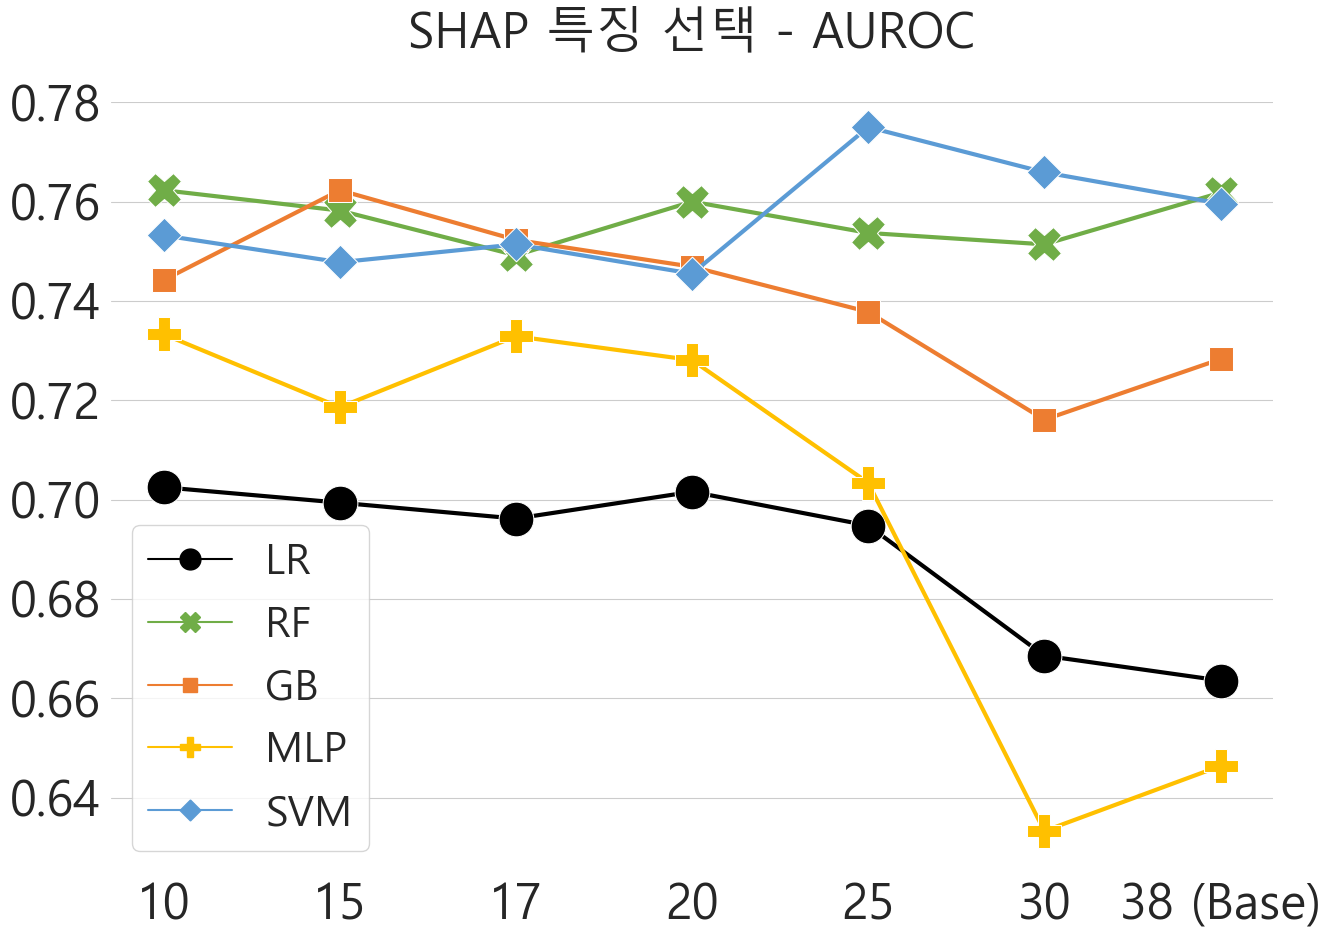

In [43]:
sns.set_style("whitegrid", {'axes.grid' : False})
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


fig = plt.figure(figsize=(15,10))

plot=sns.lineplot(data=transposed,
                  dashes=False,
                  markers=True,
                  #style='model',
                  palette=["#000000","#70ad47","#ed7d31","#ffc000","#5b9bd5"],
                  linewidth = 3,
                  markersize=25,
                  
                  ) # 마커
sns.despine(left=True, bottom=True)
plt.grid(axis='y')  #just add this
#plot.bottom_ax.grid(False)
plot.set(xlabel=None)

# slider = 0.1
# for ind in list(transposed.index):
#     for y_ind in list(transposed.columns):
#         if (ind == '38 (Base)' and y_ind=='RF') or (ind == '17' and y_ind=='GB') or (ind == '20' and y_ind=='GB') :
#             plt.text(ind, 
#                      transposed.loc[ind,y_ind]+0.007,
#                  "{:.3f}".format(transposed.loc[ind,y_ind]),
#                  fontsize=30
#                 )
#         elif (ind == '15' and y_ind=='GB') :
#             plt.text(ind, 
#                  transposed.loc[ind,y_ind]+0.007,
#                  "{:.3f}".format(transposed.loc[ind,y_ind]),
#                  fontsize=30
#                 )
#         elif (ind == '17' and y_ind=='RF') :
#             plt.text(ind, 
#                  transposed.loc[ind,y_ind]-0.005,
#                  "{:.3f}".format(transposed.loc[ind,y_ind]),
#                  fontsize=30
#                 )
#         else:
#             plt.text(ind, 
#                      transposed.loc[ind,y_ind]+0.0015,
#                      "{:.3f}".format(transposed.loc[ind,y_ind]),
#                      fontsize=30
#                     )

plt.legend(fontsize='30',markerscale=2.5)
plot.set(ylabel=None)
plt.title("SHAP 특징 선택 - AUROC",fontsize=35,pad=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

plot.axes.set_ylim(0.625,0.78)
plt.savefig('./FIGURES/auc2.png')

